In [96]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.model_selection import train_test_split
# import pickle

plt.style.use('seaborn')
df = pd.read_csv('../dataset/50_Startups.csv')

In [97]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [98]:
from statsmodels.regression.linear_model import OLS

# preprocessing

In [99]:
state_encod = OneHotEncoder(drop='first')
statedf = pd.DataFrame(state_encod.fit_transform(df[['State']]).toarray(),columns=['state1','state2'])
df = pd.concat([statedf,df],axis=1)
df.drop(['State'],inplace=True, axis=1)

In [100]:
x = df[['state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]
y = df['Profit']
scalerx = StandardScaler()
x = scalerx.fit_transform(x)
print(x[:10]) 

[[-0.68599434  1.39326109  2.01641149  0.56075291  2.15394309  2.01120333]
 [-0.68599434 -0.71774056  1.95586034  1.08280658  1.9236004   1.99942997]
 [ 1.45773797 -0.71774056  1.75436374 -0.72825703  1.62652767  1.98084225]
 [-0.68599434  1.39326109  1.55478369 -0.09636463  1.42221024  1.77662724]
 [ 1.45773797 -0.71774056  1.5049372  -1.07991935  1.28152771  1.35774012]
 [-0.68599434  1.39326109  1.27980001 -0.77623907  1.25421046  1.12724963]
 [-0.68599434 -0.71774056  1.34006641  0.93214721 -0.68814993  1.10548055]
 [ 1.45773797 -0.71774056  1.24505666  0.87198001  0.93218598  1.09620987]
 [-0.68599434  1.39326109  1.03036886  0.9869521   0.83088691  1.00746967]
 [-0.68599434 -0.71774056  1.09181921 -0.45664025  0.77610744  0.94602247]]


In [101]:
x

array([[-6.85994341e-01,  1.39326109e+00,  2.01641149e+00,
         5.60752915e-01,  2.15394309e+00,  2.01120333e+00],
       [-6.85994341e-01, -7.17740563e-01,  1.95586034e+00,
         1.08280658e+00,  1.92360040e+00,  1.99942997e+00],
       [ 1.45773797e+00, -7.17740563e-01,  1.75436374e+00,
        -7.28257028e-01,  1.62652767e+00,  1.98084225e+00],
       [-6.85994341e-01,  1.39326109e+00,  1.55478369e+00,
        -9.63646307e-02,  1.42221024e+00,  1.77662724e+00],
       [ 1.45773797e+00, -7.17740563e-01,  1.50493720e+00,
        -1.07991935e+00,  1.28152771e+00,  1.35774012e+00],
       [-6.85994341e-01,  1.39326109e+00,  1.27980001e+00,
        -7.76239071e-01,  1.25421046e+00,  1.12724963e+00],
       [-6.85994341e-01, -7.17740563e-01,  1.34006641e+00,
         9.32147208e-01, -6.88149930e-01,  1.10548055e+00],
       [ 1.45773797e+00, -7.17740563e-01,  1.24505666e+00,
         8.71980011e-01,  9.32185978e-01,  1.09620987e+00],
       [-6.85994341e-01,  1.39326109e+00,  1.030

In [102]:
df['constant'] = 1

In [103]:
df

,state1,state2,R&D Spend,Administration,Marketing Spend,Profit,constant
0,0.0,1.0,165349.20,136897.80,471784.10,192261.83,1
1,0.0,0.0,162597.70,151377.59,443898.53,191792.06,1
2,1.0,0.0,153441.51,101145.55,407934.54,191050.39,1
3,0.0,1.0,144372.41,118671.85,383199.62,182901.99,1
4,1.0,0.0,142107.34,91391.77,366168.42,166187.94,1
5,0.0,1.0,131876.90,99814.71,362861.36,156991.12,1
6,0.0,0.0,134615.46,147198.87,127716.82,156122.51,1
7,1.0,0.0,130298.13,145530.06,323876.68,155752.60,1
8,0.0,1.0,120542.52,148718.95,311613.29,152211.77,1
9,0.0,0.0,123334.88,108679.17,304981.62,149759.96,1


In [104]:
df.columns

Index(['state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend',
       'Profit', 'constant'],
      dtype='object')

In [105]:
# df.columnns = [ 'constant','state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend',
#        'Profit']
# df

In [106]:
df = df[[ 'constant','state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend',
       'Profit']]

In [107]:
df

,constant,state1,state2,R&D Spend,Administration,Marketing Spend,Profit
0,1,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,1,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,1,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,1,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,1,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,1,0.0,0.0,123334.88,108679.17,304981.62,149759.96


In [108]:
df.values.shape
x = df[[ 'constant','state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend']]

In [109]:
model = OLS(y, x.iloc[:,[0,1,2,3,4,5]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.34e-27
Time:                        15:18:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
state1            198.7888   3371.007      0.059      0.953   -6595.030    6992.607
state2            -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model = OLS(y, x.iloc[:,[0,1,3,4,5]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           8.49e-29
Time:                        15:18:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
state1            220.1585   2900.536      0.076      0.940   -5621.821    6062.138
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
model = OLS(y, x.iloc[:,[0,3,4,5]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        15:18:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
model = OLS(y, x.iloc[:,[0,3,5]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.16e-31
Time:                        15:18:04   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
x = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']
x = scalerx.fit_transform(x)

In [115]:
df

,constant,state1,state2,R&D Spend,Administration,Marketing Spend,Profit
0,1,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,1,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,1,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,1,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,1,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,1,0.0,0.0,123334.88,108679.17,304981.62,149759.96


In [116]:
model = LinearRegression()
model.fit(x,y)
yhat = model.predict(x)
df['prediction'] = yhat

<ipython-input-116-6f07e0398b54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = yhat


In [119]:
df

,constant,state1,state2,R&D Spend,Administration,Marketing Spend,Profit,prediction
0,1,0.0,1.0,165349.20,136897.80,471784.10,192261.83,192800.458625
1,1,0.0,0.0,162597.70,151377.59,443898.53,191792.06,189774.659480
2,1,1.0,0.0,153441.51,101145.55,407934.54,191050.39,181405.378097
3,1,0.0,1.0,144372.41,118671.85,383199.62,182901.99,173441.308842
4,1,1.0,0.0,142107.34,91391.77,366168.42,166187.94,171127.623218
5,1,0.0,1.0,131876.90,99814.71,362861.36,156991.12,162879.310812
6,1,0.0,0.0,134615.46,147198.87,127716.82,156122.51,158028.130454
7,1,1.0,0.0,130298.13,145530.06,323876.68,155752.60,160455.738877
8,1,0.0,1.0,120542.52,148718.95,311613.29,152211.77,152317.803673
9,1,0.0,0.0,123334.88,108679.17,304981.62,149759.96,154343.813935


In [120]:
model.score(x,y)

0.9504503015559763

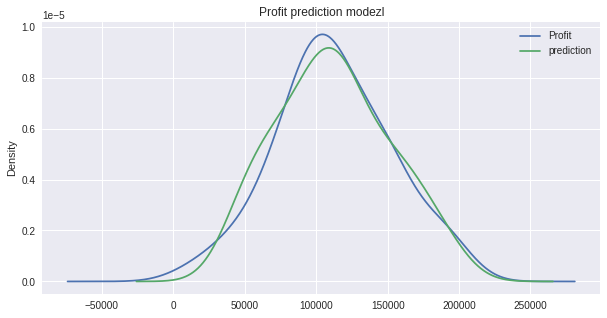

In [122]:
df[['Profit','prediction']].plot(kind='kde',figsize=(10,5),title='Profit prediction modezl')
plt.show()